<center>
<img src="logo.png" height="900"> 
</center>


#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [2]:
norm_rv = sts.norm(loc=4, scale=10)

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [3]:
# p1 -> 𝑃(𝑋>4) 
# p2 -> 𝑃(𝑋∈[2;20])
# p3 -> 𝑃(𝑋<−5)

p1 = norm_rv.cdf(4) 
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5) 

print(p1, p2, p3, sep='\n')

0.5
0.5244604177395451
0.18406012534675947


In [4]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [5]:
a = norm_rv.ppf(1-0.3)
a

9.244005127080406

In [6]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [7]:
# 0.5 = norm_rv.cdf(4+b) - norm_rv.cdf(4-b)
# еще бы понять логику данного номера...

b = norm_rv.ppf(0.5) + norm_rv.ppf(0.75) - 8
b

6.744897501960818

In [8]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

In [9]:
ex = norm_rv.rvs(100)
ex[:10]

array([ 5.82191331, 22.34635723,  6.98605921, 17.5918056 , 10.31316727,
       15.63230783,  6.31692086,  5.34187829, 13.16081903, -4.03935634])

Text(0, 0.5, '$f(x)$')

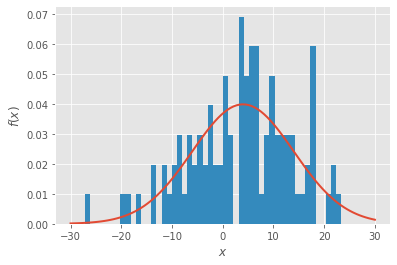

In [10]:
x = np.linspace(-30, 30, 100)

# плотность
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=2)

plt.hist(ex, bins=50, density=True)

plt.xlabel('$x$')
plt.ylabel('$f(x)$')

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

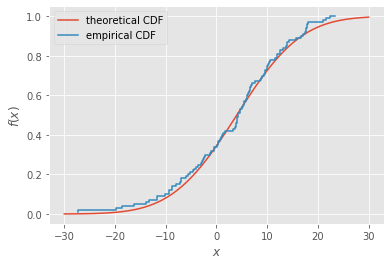

In [11]:
from statsmodels.distributions.empirical_distribution import ECDF
x = np.linspace(-30, 30, 100)

cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

ecdf = ECDF(ex)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='upper left')

## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [12]:
pois = sts.poisson(3)

In [13]:
n0 = pois.cdf(0)
n1 = pois.cdf(1)
n2 = pois.cdf(2)
n3 = pois.cdf(3)
n4 = pois.cdf(4)

spam = 1 - (n0+n1+n2+n3+n4)

print(n0, n1, n2, n3, n4, sep='\n')
print('\n spam:', spam)

0.04978706836786395
0.1991482734714558
0.42319008112684364
0.6472318887822313
0.8152632445237722

 spam: -1.134620556272167


In [14]:
import math

def pois_dist(l, k):
    return math.exp(-l)*((l**k)/math.factorial(k))

n0 = pois_dist(3, 0)
n1 = pois_dist(3, 1)
n2 = pois_dist(3, 2)
n3 = pois_dist(3, 3)
n4 = pois_dist(3, 4)

p = 1 - (n0+n1+n2+n3+n4)
print(n0, n1, n2, n3, n4, sep='\n')
print('\n spam:', p)

0.049787068367863944
0.14936120510359183
0.22404180765538775
0.22404180765538775
0.16803135574154082

 spam: 0.18473675547622792


In [15]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [17]:
# f(k) = \binom{n}{k} p^k (1-p)^{n-k}
# binom(n, p)
# return k
# n - количество попыток
# k - количество попаданий
# p - вероятность успеха

binom = sts.binom(14, 0.5)

In [22]:
### Биноминальное распределение

p = binom.cdf(12)
p

0.99908447265625

In [23]:
n = 14
k = 12
pr = 0.5

p = math.comb(n, k) * (pr**k * (1-pr)**(n-k))
p

AttributeError: module 'math' has no attribute 'comb'

In [21]:
assert np.abs(p - 0.0055541) < 1e-5

AssertionError: 

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = ...

# your code here


In [ ]:
assert np.abs(p - 0.2570108) < 1e-5